 # DBSCAN

Density-based spatial clustering of application with noise (DBSCAN) is a density-based algorithm. The goal of density-based clustering is to find high-density regions separated by low-density regions. The difference between distance-based clustering and density-based clustering is that the result of distance-based one is spherical clusters and that of density-based one can be of any shape.

To give you a glimpse, this tutorial covers the following the topics:
- [Parameters](#Parameters)
- [Basic Concepts](#Basic-Concepts)
- [Algorithm](#Algorithm)
- [Parameters Estimation](#Parameters-Estimation)
    - [minPts](#minPts)
    - [distance ε](#distance-ε)
- [Analysis of DBSCAN](#Analysis-of-DBSCAN)
    - [Advantages of DBSCAN](#Advantages-of-DBSCAN)
    - [Disadvantages of DBSCAN](#Disadvantages-of-DBSCAN)
- [Complexity](#Complexity)    
    - [Time Complexity](#Time-Complexity) 
    - [Space Complexity](#Space-Complexity) 
- [Implementation of Algorithm](#Implementation-of-Algorithm) 
    - [Use DBSCAN algorithm in sklearn package](#Use-DBSCAN-algorithm-in-sklearn-package) 
    - [DBSCAN is sentitive to ε and minPts](#DBSCAN-is-sentitive-to-ε-and-minPts) 
- [Further Discussion](#Further-Discussion)    

## Parameters

Here, we need two parameters: distance ε and minPts. Distance ε represents the radius of a neighborhood area with given data point P as the center. minPts is the least number of data points within the neighborhood of the given point P.

## Basic Concepts

In Density-based spatial clustering of application with noise(DBSCAN), data points are usually divided into three kinds:
1.	Core points: In its neighborhood area with radius ε, there are at least minPts points.

2.	(Density-)reachable points: Also called as border points. In its neighborhood area with radius ε, the number of data points is less than Minpts. And this point is within the neighborhood of a core point.

3.	Outliers: Those points are neither core points nor reachable points.

Besides these above, we have to know some more concepts.
1.	Directly density-reachable: given a dataset D, if q is a core point and data point p is within the distance ε of q, then we can say that p is directly density-reachable from q.
2.	Density-reachable: given a dataset D, if a data point p is reachable from a chain of data points p1, p2…pn, then we can say that p is density-reachable from pn. Here, p2 is directly density-reachable from p1, p3 is directly density-reachable from p2, etc.
3.	Density-connected: if a data point o exists, p and q are both density-reachable from o, then p is density-connected from q.


<img style="float: middle;" src="DBSCAN-Illustration.svg" width="40%">
Source: wikipedia

Let’s illustrate the concepts using the above graph.
1.	If minPts is 3, the red points are core points. Because for each core points, there are at least three points in the circle of the core point; in other words, at least minPts points are within distance ε of each core points. The blue point is outlier. The yellow points are reachable points.
2.	The other red data points in the circle from the center of A are directly density-reachable by A. 
3.	The other red points except within the circle of A are density-reachable by A.
4.	If two points are density-reachable by A, then the two points are density-connected.


## Algorithm

1.	According to the input (ε and minPts), divide data points to core points, density-reachable points and outliers.
2.	Delete all outliers.
3.	Every pair of two core points within the distance ε are assigned a line.
4.	Each cluster consists of a group of core points connected by lines.
5.	Assign each density-reachable point to the cluster where a core point is directly reachable to it.

## Parameters Estimation

### minPts

   As a rule of thumb, minPts >= dim+1. dim represents the dimension of dataset DB. If minPts=1, then every point is a cluster. If minPts ≤ 2, the result will be the same as of hierarchical clustering with the single link metric, with height ε. So it is reasonable to choose minPts >=3. If minPts is too small, in sparse cluster, some points may not be recognized as core points and not good for cluster extension. If minPts is too large, two sparse clusters may be recognized as one cluster. So minPts makes a difference in the clustering result.

### distance ε

The value for ε can then be chosen by using a k-distance graph. Given a dataset P, for a random data point P(i), calculate the distances between P(i) and other all points except itself, and sort distances ascendingly, resulting in distance set D={d(1), d(2),….,d(k-1),d(k),…,d(n)}. K distance is d(k); in other words, k-distance is P(i) is the k nearest distance of distances between P(i) and all other points except itself. For each point, compute a k-distance and result in a k-distance set E={e(1), e(2), …, e(n)}. K is minPts in this case.
Sort E ascendingly, and plot it. Choose the distance of the turning point in the plot as distance ε. 

I will show you how to choose it using k-distance graph.

## Analysis of DBSCAN

### Advantages of DBSCAN
1.	Compared with k-means, the number of clusters is not needed.
2.	The shape is not constrained to a specific one.
3.	It can filter out noise.

<a id='1.2'></a>
### Disadvantages of DBSCAN
1.	The distance metric matters. Euclidean distance is the most common one. However, for high-dimensional dataset, it is hard to choose a proper distance ε.
2.	The model is sensitive to ε and minPts. Small changes to the parameters can cause really different results.
3.	When dealing with assigning reachable points to a cluster, if this reachable point is directly reachable from several core points, then this assignment depends on the order of cluster.

## Complexity

### Time Complexity

1.	The basic time complexity is O(N * time to find all points within distance ε). N is the number of all data points. The worse case is O(N^2).
2.	When using some data structures like KD tree for low-dimensional data, time complexity can be decreased to O(NlogN).

### Space Complexity

For both low-dimensional and high-dimensional data, space complexity is O(N). 

The input is dataset DB, distance ε and minPts. 

## Implementation of Algorithm

The following code shows how I implement the algorithm.

First, create data set that clusters can be easily recognized.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline
x1 = -10 + 3 * np.random.randn(200)
y1 = 10 + 5 * np.random.randn(200)

x2 = 15 + 3.5 * np.random.randn(200)
y2 = 10 + 2.5 * np.random.randn(200)

x3 = -15 + 3 * np.random.randn(200)
y3 = -10 + 4.3 * np.random.randn(200)

x4 = 5 + 2.2 * np.random.randn(200)
y4 = -16 + 5 * np.random.randn(200)

data1 = np.column_stack((x1,y1))
data2 = np.column_stack((x2,y2))
data3 = np.column_stack((x3,y3))
data4 = np.column_stack((x4,y4))

Data = np.vstack((data1,data2,data3,data4))
points=[]
for point in Data:
    points.append(list(point))

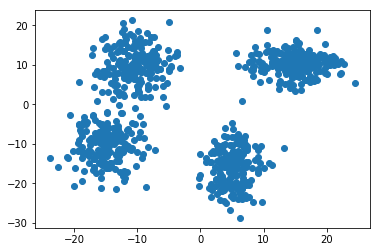

In [2]:
plt.scatter(Data[:,0],Data[:,1])
plt.show()

From the above plot, the data points are mainly divided into four groups. I temporarily make minPts 45, since the data points in one cluster are closely located to each other. Then, use k-distance graph to choose the distance ε.

In [3]:
# The three functions are used to compute the k-distance.
def distance(d1,d2):
    return np.sqrt((d1[0]-d2[0])**2+(d1[1]-d2[1])**2)
def k_distance(p,db,k):
    result=[]
    for i in db:
        result.append(distance(i,p))
        result.sort() 
    return result[k]

def all_k_distance(db,k):
    result=[]
    for i in db:
        result.append(k_distance(i,db,k))
    result.sort()
    return result

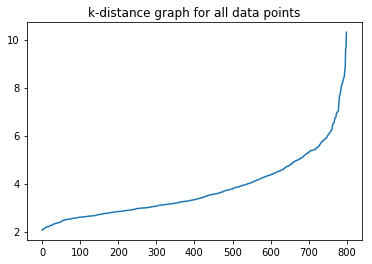

In [4]:
# Plot the k-distance graph for all data points.
k_di=all_k_distance(points,45)
plt.plot(range(len(k_di)),k_di)
plt.title("k-distance graph for all data points")
plt.show()

Since it is a little hard to determine the "elbow" of the above plot. I plot another k-distance graph for the part of the data points.

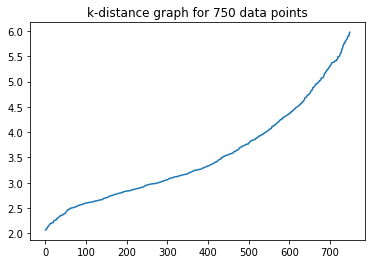

In [5]:
# Plot the k-distance graph for all data points.
plt.plot(range(len(k_di[:750])),k_di[:750])
plt.title("k-distance graph for 750 data points")
plt.show()

From this graph, I choose **4** as **distance ε**.

In [6]:
eps = 4
minPts = 45

core = []
reachable = [] 
outliers = []

# put all core points to a group.
for point in points:
    count=0
    for another_point in points:
        if distance(point, another_point) < eps and another_point != point:
            count=count+1
    if count >= minPts:
            core.append(point)
# put all reachable points to a group.            
for point in points:
    for corepoint in core:
        if distance(point, corepoint) < eps and point not in core:
            reachable.append(point)
            break
# put all outliers to a group.            
for point in points:
    if point not in core and point not in reachable:
        outliers.append(point)

In [7]:
# This function is used to find all other core points connected with the specific core point.
def connectpoints(point, agroup):
    result=[]
    for i in agroup:
        if distance(point, i)< eps:
            result.append(i)
    return result           

In [8]:
# Those density-reachable core points grouping as a cluster.
cluster=[]
core1=copy.deepcopy(core)
for point in core1:
    group=[]
    group.append(point)
    core1.remove(point)
    connected=connectpoints(point,core1)
    group.extend(connected)
    for i in connected:
        core1.remove(i)
    while(connected!=[]):
        connected=connectpoints(point,core1)
        group.extend(connected)
        for i in connected:
            core1.remove(i)
    cluster.append(group)

In [9]:
# Join the reachable points into different clusters based on directly reaching to the core point.
re_cluster=copy.deepcopy(cluster)
for i in reachable:
    flag=0
    for num in range(len(cluster)):
        s_group=cluster[num]
        for j in s_group:
            if distance(i,j) < eps:
                re_cluster[num].append(i)
                flag=1
                break
        if flag==1:
            break

In [10]:
# Plot differnet clusters in different color.
label=[]
for i in  range(len(re_cluster)):
    label.extend([i]* len(re_cluster[i]))
label.extend([len(re_cluster)] * len(outliers))

result_x=[val[0] for sublist in re_cluster for val in sublist]
result_y=[val[1] for sublist in re_cluster for val in sublist]
result_x.extend([val[0] for val in outliers])
result_y.extend([val[1] for val in outliers])

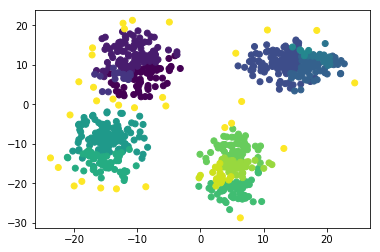

In [11]:
plt.scatter(result_x,result_y,c=label)
plt.show()

My version for implementing the DBSCAN does not work really well compared to that from sklearn package. Because assigning reachable points to a cluster, if this reachable point is directly reachable from several core points, then this assignment depends on the order of cluster.

### Use DBSCAN algorithm in sklearn package

Find more in the [official documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

In [12]:
# DBSCAN算法
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
eps = 4
minPts = 45

db = DBSCAN(eps=eps, min_samples=minPts).fit(Data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

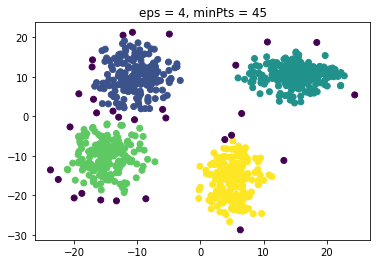

In [13]:
plt.scatter(Data[:,0],Data[:,1],c=labels)
plt.title("eps = 4, minPts = 45")
plt.show()

###  DBSCAN is sentitive to ε and minPts

**To illustrate that DBSCAN is sentitive to ε and minPts. Here, I will show you that different values lead to different results.**

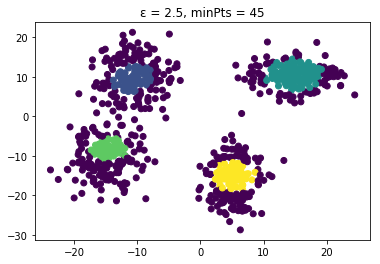

In [14]:
# DBSCAN算法
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
eps = 2.5
minPts = 45

db = DBSCAN(eps=eps, min_samples=minPts).fit(Data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
plt.scatter(Data[:,0],Data[:,1],c=labels)
plt.title("ε = 2.5, minPts = 45")
plt.show()

When distance ε decreasing from 4 to 2.5, a whole cluster is recognized as outliers.

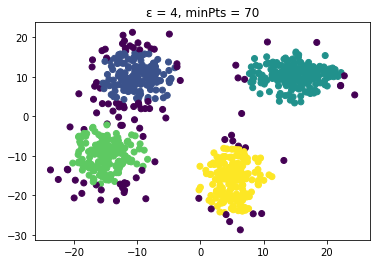

In [15]:
# DBSCAN算法
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
eps = 4
minPts = 70

db = DBSCAN(eps=eps, min_samples=minPts).fit(Data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
plt.scatter(Data[:,0],Data[:,1],c=labels)
plt.title("ε = 4, minPts = 70")
plt.show()

When minPts increasing from 40 to 70, more points are recognized as outliers.

## Further Discussion
[Generalized DBSCAN](https://link.springer.com/article/10.1023%2FA%3A1009745219419) (GDBSCAN) is a generalization for DBSCAN where the ε and minpts parameters are removed from the original algorithm and moved to the predicates.